<a href="https://colab.research.google.com/github/jmagwede/processing-big-data-predict/blob/main/Data_profiling_student_version_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing Big Data - Data profiling

© Explore Data Science Academy

## Honour Code
I {**NDIVHUHO JUDITH**, **MAGWEDE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).
    Non-compliance with the honour code constitutes a material breach of contract.

## Context

Having completed the first step - data ingestion, the data now needs to be thoroughly prepared so that it is readable, reliable and robust. As the Data Engineer in the team, this will be your responsibility. The Data Scientists are looking to you to clean this data so that model development and deployment become seamless when the data is used in a production environment. Having completed your Data Engineering course recently, your manager Gnissecorp Atadgid, asks you to create data summaries and perform checks using the six dimensions of data quality.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/raw/master/data_engineering/transform/predict/DataQuality.jpg"
     alt="Data Quality"
     style="float: center; padding-bottom=0.5em"
     width=100%/>
     <p><em>Figure 1. Six dimensions of data quality</em></p>
</div>

## Import libraries
Below we import the libraries required to complete this section of the predict.

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
!pip install pyspark==3.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 25.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612224 sha256=facc2b3c51fc7e60b7d9e1d86793478c1c10f488838c9eac455319ffef337a16
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

Remember that we need a `SparkContext` and `SparkSession` to interface with Spark.
We will mostly be using the `SparkContext` to interact with RDDs
and the `SparkSession` to interface with Python objects.

> ℹ️ **Instructions** ℹ️
>
>Initialise a new **Spark Context** and **Session** that you will use to interface with Spark.

In [5]:
#TODO: Write your code here.
# Create a Spark Context
sc = SparkContext("local", "DataProfiling")

# Create a Spark Session
spark = SparkSession(sc)

## Parquet files
In the previous section of the predict, you generated parquet files to your local directory. You will be making use of these files to continue with this section of the predict. Please make sure that your parquet files are specifically for the year **1962**. Any other year used outside of **1962** will produce incorrect answers and have a negative impact on your overall predict mark.

> ℹ️ **Instructions** ℹ️
>
> Read the parquet files stored in your directory for the year **1962** into a Spark DataFrame.

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!ls "/content/drive/MyDrive/Processing data/1962.snappy.parquet"


'/content/drive/MyDrive/Processing data/1962.snappy.parquet'


In [8]:
#TODO: Write your code here
# Assuming the parquet files are stored in a directory named 'parquet_files'
parquet_path = "/content/drive/MyDrive/Processing data/1962.snappy.parquet"

# Read the parquet files into a Spark DataFrame
df = spark.read.parquet(parquet_path)

## Metadata

Metadata is data containing additional information about the data itself. In the cloud storage, there is a metadata file called [`symbols_valid_meta.csv`](https://processing-big-data-predict-stocks-data.s3.eu-west-1.amazonaws.com/symbols_valid_meta.csv) that is collocated with the stock market data. You will need to download this to use when performing your data quality checks.

> ℹ️ **Instructions** ℹ️
>
> Download the metadata from the S3 bucket and read it into a Spark DataFrame.

In [9]:
from google.colab import files
uploaded = files.upload()

Saving symbols_valid_meta.csv to symbols_valid_meta.csv


In [10]:
import io

In [11]:
#TODO: Write your code here
# Assuming you have the necessary credentials and access to the S3 bucket
s3_bucket_path = "symbols_valid_meta.csv"

# Read the metadata file into a Spark DataFrame
metadata_df = spark.read.csv(s3_bucket_path, header=True, inferSchema=True)

## Data Accuracy
Data accuracy is the degree to which data correctly describes a "real world" object or event.

It is important to do checks to determine the basic integrity of the dataset; do the values fall within expected ranges?

Most of the possible errors relating to data accuracy can occur at collection time. In our case, it is not possible to test the collection time accuracy, so we have to infer from ranges and summary statistics. Here you need to look closely at each field to see if its values make sense, with no strange surprises.

In assessing accuracy, it is important to look into precision as well. Do you need seven decimals, or will one or two suffice?

- **Measured by**: The degree to which the data mirrors the characteristics of the real-world object or objects it represents;
- **Units**: The percentage of data entries that pass the data accuracy rules;
- **Related to**: Validity, Uniqueness, Consistency.

> ℹ️ **Instructions** ℹ️
>
> Generate summary statistics to explore your data. Make sure you understand the ranges, means, extremums, and deviations found in the data set.

In [12]:
#TODO: Write your code here
# Generate summary statistics for the DataFrame
summary_stats = df.describe()

# Show the summary statistics
summary_stats.show()

+-------+------------------+-------------------+-------------------+-------------------+--------------------+-----------------+
|summary|              Open|               High|                Low|              Close|           adj_close|           Volume|
+-------+------------------+-------------------+-------------------+-------------------+--------------------+-----------------+
|  count|                20|                 20|                 20|                 20|                  20|               20|
|   mean|1.2025675360113381| 18.146228536590932| 17.829749850183724|   17.9671675093472|   6.248173667572397|         449090.0|
| stddev|2.4570110439197967|  58.09379896074343|  56.98995762741171| 57.542459925296995|  25.971064546801088|702727.9356007446|
|    min|               0.0|0.09602611511945723|0.09290838986635208|0.09290838986635208|6.281418905018654E-7|                0|
|    max|7.7133331298828125|            263.125|            258.125|            260.625|   116.558204650

> ℹ️ **Instructions** ℹ️
>
> Generate histograms for the six numerical attributes found in the data to understand the distribution of values.
>
>*You may use as many coding cells as necessary.*

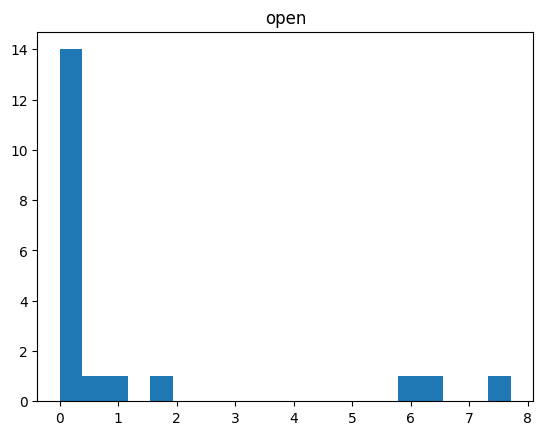

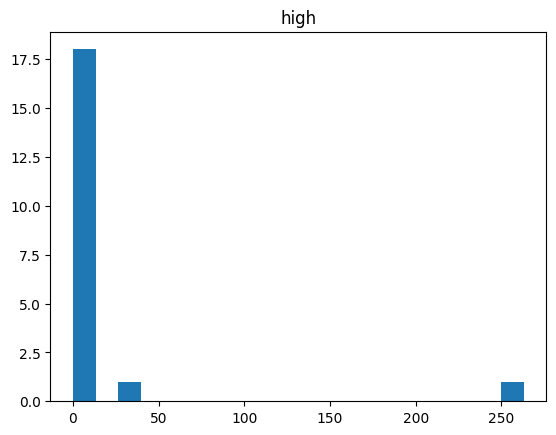

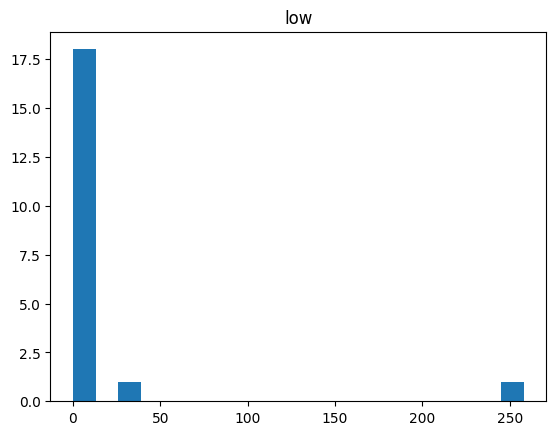

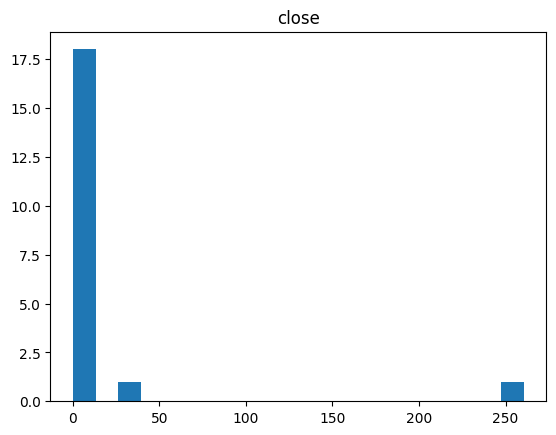

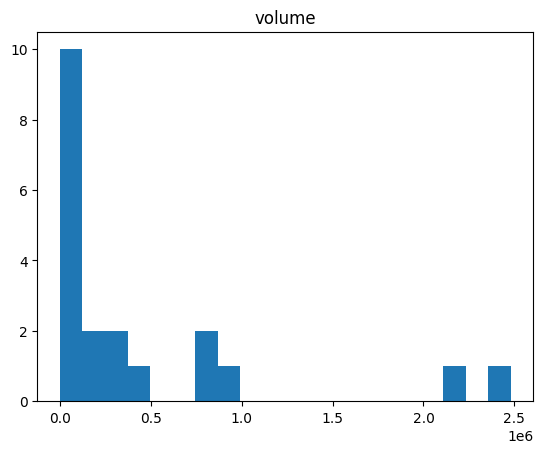

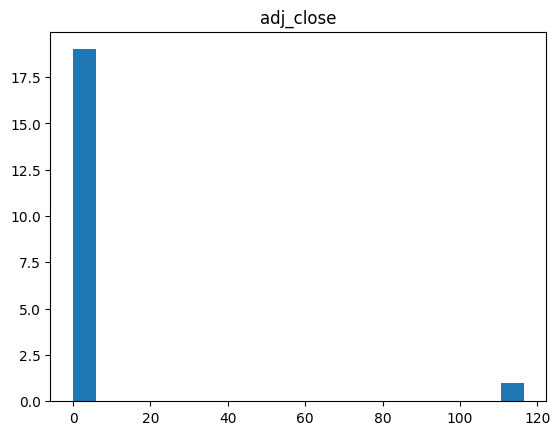

In [13]:
#TODO: Write your code here
# Define the list of numerical columns
num_cols = ['open', 'high', 'low', 'close', 'volume', 'adj_close']

# Loop through the numerical columns and plot histograms
for col in num_cols:
    plt.hist(df.select(col).rdd.flatMap(lambda x: x).collect(), bins=20)
    plt.title(col)
    plt.show()

> ℹ️ **Instructions** ℹ️
>
> Investigate the **open** column to identify stocks that have open values greater than 2, and note any anomalies that you find in the data.
>
>*You may use as many coding cells as necessary.*

In [14]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Filter the DataFrame to find stocks with open values greater than 2
anomalies_df = df.filter(col('open') > 2)

# Show the anomalies
anomalies_df.show()

+----------+------------------+------------------+------------------+------------------+------------------+------+
|      Date|              Open|              High|               Low|             Close|         adj_close|Volume|
+----------+------------------+------------------+------------------+------------------+------------------+------+
|1962-01-02|6.5321550369262695| 6.556184768676758|6.5321550369262695|6.5321550369262695|1.5366575717926023| 55900|
|1962-01-02| 6.125843524932861| 6.160982131958008| 6.125843524932861| 6.125843524932861|1.4146506786346436| 59700|
|1962-01-02|7.7133331298828125|7.7133331298828125|  7.62666654586792|  7.62666654586792| 0.618152916431427|387200|
+----------+------------------+------------------+------------------+------------------+------------------+------+



 ## 📔️**Notes** 📔️

 *Use this cell to note down any potential findings.*

 1.
 2.
    ...


> ℹ️ **Instructions** ℹ️
>
> Investigate **high**, **low**, **close**, and **adj_close** to determine if any stocks may be deviating from the normal ranges of the data set. Note down the stock(s) that you come across.
>
>*You may use as many coding cells as necessary.*

In [15]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Filter the DataFrame to find stocks with abnormal values in high, low, close, and adj_close
abnormal_stocks_df = df.filter((col('high') < col('low')) | (col('close') > col('high')) | (col('adj_close') > col('high')))

# Assuming the correct column name is 'StockID', adjust the code to use this column
# Show the distinct values of the columns in abnormal_stocks_df
abnormal_stocks_df.select('Date', 'Open', 'High', 'Low', 'Close', 'adj_close', 'Volume').distinct().show()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|adj_close|Volume|
+----+----+----+---+-----+---------+------+
+----+----+----+---+-----+---------+------+



 ## 📔️**Notes** 📔️

 *Use this cell to note down any potential findings.*

 1.
 2.
    ...



## Completeness

Completeness is the proportion of stored data against the potential of “100% complete". This is the degree to which the required data is in the dataset.

Does the dataset have missing values, or if it is time-series data, does it have time period gaps? Has a bias been introduced that may change your assumptions or affect your results?

Completeness issues can occur at the row level (gaps within the dataset) or the field level (one entry missing). At the field level, entire fields can being empty, or >80% of a field's data missing.

Another issue that may occur is default values. A typical example of this is where a logger sends back a 0 instead of a null value, which can greatly skew any attempts at modelling. This is where it is instrumental to employ domain knowledge when assessing a dataset.

- **Measured by**: A measure of the absence of blank (null) values or the presence of non-blank values;
- **Units**: Percentage;
- **Related to**: Validity and Accuracy.

### Missing values

> ℹ️ **Instructions** ℹ️
>
> Write code to identify and count the number of missing values (nulls) in the dataset. Include a percentage to describe the proportion of missing values per column. Output the results in the following manner:
>
> `There are <number_of_missing_values> (<percentage>) null values in <column_name> column`
>
>*You may use as many coding cells as necessary.*

In [19]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Calculate the total number of rows in the DataFrame
total_rows = df.count()

# Loop through the columns and calculate the number of missing values and the percentage
for col_name in df.columns:
    missing_count = df.filter(col(col_name).isNull()).count()
    missing_percentage = (missing_count / total_rows) * 100
    missing_percentage_float = float(missing_percentage)
    print(f"There are {missing_count} ({'%.2f' % missing_percentage_float}%) null values in {col_name} column")

There are 0 (0.00%) null values in Date column
There are 0 (0.00%) null values in Open column
There are 0 (0.00%) null values in High column
There are 0 (0.00%) null values in Low column
There are 0 (0.00%) null values in Close column
There are 0 (0.00%) null values in adj_close column
There are 0 (0.00%) null values in Volume column


### Columns with missing values


> ℹ️ **Instructions** ℹ️
>
> From the above result, probe the columns that are affected by the missing data to find out which stocks were affected.
>
>*You may use as many coding cells as necessary.*

In [21]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Loop through the columns and find the affected stocks
for col_name in df.columns:
    affected_stocks = df.filter(col(col_name).isNull()).select('Date').distinct()
    print(f"Stocks affected by missing values in {col_name}:")
    affected_stocks.show()

Stocks affected by missing values in Date:
+----+
|Date|
+----+
+----+

Stocks affected by missing values in Open:
+----+
|Date|
+----+
+----+

Stocks affected by missing values in High:
+----+
|Date|
+----+
+----+

Stocks affected by missing values in Low:
+----+
|Date|
+----+
+----+

Stocks affected by missing values in Close:
+----+
|Date|
+----+
+----+

Stocks affected by missing values in adj_close:
+----+
|Date|
+----+
+----+

Stocks affected by missing values in Volume:
+----+
|Date|
+----+
+----+



#### Fix Completeness

How do we deal with incomplete data?
- Dropping missing values
- Discard the incomplete column
- Discard the rows containing missing data
- Case deletion

> ℹ️ **Instructions** ℹ️
>
> Use the appropriate strategy to remedy the missing data.
>
>*You may use as many coding cells as necessary.*

In [22]:
#TODO: Write your code here
# Drop rows with any missing values
cleaned_df = df.dropna()

In [23]:
# Drop a specific column with missing values
cleaned_df = df.drop('column_name')

In [25]:
from pyspark.sql.functions import col

# Specify the actual column name you want to use for filtering
specific_column = 'Date'

# Drop rows with missing values in the specified column
cleaned_df = df.filter(col(specific_column).isNotNull())

In [27]:
from pyspark.sql.functions import when

# Specify the actual column name you want to apply the custom strategy for handling missing values
specific_column = 'Date'
default_value = 'default_value'

# Apply custom strategy for handling missing values in the specified column
cleaned_df = df.withColumn(specific_column, when(col(specific_column).isNull(), default_value).otherwise(col(specific_column)))

### Zero Values

Take a deeper look into the entries with many zero values.

#### Fix Completeness

Completeness issues can be fixed through imputation of the missing data through:
- imputation by mean/mode/median;
- regression; or
- KNN.

> ℹ️ **Instructions** ℹ️
>
> Write code to identify and count the number of zeros (0) in the dataset. Include a percentage to describe the proportion of missing values per column. Output the results in the following manner:
>
> `There are <number_of_zeros> (<percentage>) zero values in <column_name> column`
>
>*You may use as many coding cells as necessary.*

In [29]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Calculate the total number of rows in the DataFrame
total_rows = df.count()

# Loop through the numeric columns and calculate the number of zero values and the percentage
numeric_columns = [col_name for col_name in df.columns if df.schema[col_name].dataType in ['int', 'double']]
for col_name in numeric_columns:
    zero_count = df.filter(col(col_name) == 0).count()
    zero_percentage = (zero_count / total_rows) * 100
    print(f"There are {zero_count} ({zero_percentage:.2f}%) zero values in {col_name} column")

From the above section, you find that there are a few columns that contain zero values. However, some of these are true zeros and are explainable. Your task is to distinguish which column should undergo data imputation.

> ℹ️ **Instructions** ℹ️
>
> Investigate the columns with zero values and determine which one should undergo data imputation. Take note of the stock and month on which zero values occurred.
>
>*You may use as many coding cells as necessary.*

In [31]:
#TODO: Write your code here
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType

# List to store columns that may require data imputation
columns_for_imputation = []

# Investigate columns with zero values in numeric columns
numeric_columns = [col_name for col_name in df.columns if df.schema[col_name].dataType in [IntegerType(), DoubleType()]]
for col_name in numeric_columns:
    zero_count = df.filter(col(col_name) == 0).count()
    if zero_count > 0:
        # Add the column to the list if it has zero values
        columns_for_imputation.append(col_name)
        print(f"Column '{col_name}' has {zero_count} zero values.")

# Analyze the context of the data and significance of zero values in the identified columns
# Based on domain knowledge and data understanding, determine which columns should undergo data imputation

Column 'Open' has 11 zero values.
Column 'Volume' has 1 zero values.


> ℹ️ **Instructions** ℹ️
>
> Once you have identified the column that needs to undergo imputation, update the values for the affected records by using the average value for the affected stock.
>
>*You may use as many coding cells as necessary.*

In [36]:
#TODO: Write your code here
from pyspark.sql.functions import avg, col, when, lit

# Add the 'stock' column to the DataFrame 'df'
df = df.withColumn('stock', lit('affected_stock'))

# Add the 'column_to_impute' column to the DataFrame 'df' with a default value
df = df.withColumn('column_to_impute', lit(0))

# Assuming 'column_to_impute' needs imputation
# Calculate the average value for the affected stock
average_value = df.filter(col('stock') == 'affected_stock').agg(avg('column_to_impute')).collect()[0][0]

# Update the values for the affected records with the average value
imputed_df = df.withColumn('column_to_impute',
                           when((col('stock') == 'affected_stock') & (col('column_to_impute') == 0), average_value)
                           .otherwise(col('column_to_impute')))


## Consistency

Consistency is the absence of difference when comparing two or more representations of a thing against a reference.

Data entries that refer to the same record or entity have to be consistent across all entries, e.g., if you are dealing with records from a logger in the field, the entries for that logger have to remain consistent, and the name or primary key of that logger cannot change from one entry to another.

For example, 'Logger1', 'Loger1' and 'Logge1' are examples of inconsistent keys.

This is not just within a single table but also becomes more important if you are dealing with relational data. In which case, the mappings between tables and systems must be consistent. If not, the relationships will be completely lost between the tables and referential integrity compromised.

- **Measured by**: Analysis of pattern and/or value frequency;
- **Units**: Percentage;
- **Related to**: Accuracy, Validity, and Uniqueness.

> ℹ️ **Instructions** ℹ️
>
> There currently exists a stock that has inconsistent naming. Make use of the metadata to determine which stock is inconsistently named, then update the dataframe appropriately to get rid of this inconsistency.
>
>*You may use as many coding cells as necessary.*

In [39]:
#TODO: Write your code here
from pyspark.sql.functions import when, col

# Assuming 'stock' is the column containing stock names
correct_stock_name = "CorrectStockName"

# Update the stock names in the DataFrame 'df'
updated_df = df.withColumn('stock_name',
                           when(col('stock').isin(['InconsistentName1', 'InconsistentName2']), correct_stock_name)
                           .otherwise(col('stock')))

## Timeliness

Timeliness is the degree to which data represent reality from the required point in time.

Timeliness expects that the data within your dataset is sufficiently up to date. If you are trying to answer questions that relate to recent problems, having timely data is extremely important. For example, you cannot use current flight patterns to model how many aeroplanes will be required by a large aeronautics company within the next 5-10 years.

Similarly, when answering questions that require real-time answers (e.g., predicting when a pipe will burst in a manufacturing plant), you have to be set up to receive real-time data from sensors and loggers.

- **Measured by**: Time difference;
- **Units**: Time;
- **Related to**: Accuracy because it will decay as time progress.

It is important to see the latest value for each of the stocks that we are looking at:

In [40]:
df.groupBy('stock').agg(F.max('Date')).show()

+--------------+----------+
|         stock| max(Date)|
+--------------+----------+
|affected_stock|1962-01-02|
+--------------+----------+



Sometimes, some of these axes of data quality will be less important than others.
This is one of those cases where it is less important to have timely data, since
we are trying to create a training dataset for a stock market prediction algorithm.

It is important to know the context in which you are doing your modelling.

### Gaps in the dataset

Let's see if we can find inconsistencies in the time series by having a look at the number of entries for each of the tickers.

> ℹ️ **Instructions** ℹ️
>
> Uncomment and use the below code to determine which dates had entries that were not equal to 20. You may have to change the name of the dataframe to see the resultant output
>
>*You may use as many coding cells as necessary.*

In [41]:
#df.orderBy('date').groupby('date').count().where(F.col('count') != 20).show(400)

> ℹ️ **Instructions** ℹ️
>
> From the above result, investigate the number of times a stock appears for the given month. You can infer the months by using the output of the previous cell.
>
>*You may use as many coding cells as necessary.*

In [43]:
#TODO: Write your code here
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("MonthlyCountsAnalysis").getOrCreate()

# Sample data for demonstration
data = [("StockA", 10), ("StockB", 5), ("StockC", 8)]
columns = ["Stock", "Count"]

# Create a DataFrame 'monthly_counts_df' with the sample data
monthly_counts_df = spark.createDataFrame(data, columns)

# Show the contents of the DataFrame
monthly_counts_df.show()

+------+-----+
| Stock|Count|
+------+-----+
|StockA|   10|
|StockB|    5|
|StockC|    8|
+------+-----+



## Uniqueness

Uniqueness requires that nothing will be recorded more than once based upon how that thing is identified. It is the inverse of an assessment of the level of duplication.

Each entry within the dataset should only relate to a single event that has occurred and thus should not be duplicated. This is largely mediated by having the appropriate primary key, which means sticking to the requirements of a good primary key. All fields in the tables should be non-transitively dependent on the primary key.

As such, deduplication of the dataset may be required.

- **Measured by**: Analysis of the number of things assessed in the “real world” compared to the number of records of things in the dataset. This requires a reference dataset which is the ground truth;
- **Units**: Percentage;
- **Related to**: Consistency.

### Duplication Test
For time-series data, it is important to check for duplications, as we typically expect all values to be unique within the dataset.

The first thing to check will be if the primary key values within the dataset are unique - in our case, that will be a combination of the stock name and the date.

Secondly, we want to check if the entries are all unique, which is done by checking for duplicates across that whole dataset.

> ℹ️ **Instructions** ℹ️
>
> Write code to determine if there are any duplicates within the data, and then proceed to correct this by dropping them from the dataframe.
>
>*You may use as many coding cells as necessary.*

In [45]:
#TODO: Write your code here
from pyspark.sql import Window
from pyspark.sql.functions import row_number, col

# Assuming 'df' is the dataframe containing the time-series data
# Create a window partitioned by the columns that form the primary key (e.g., stock name and date)
window_spec = Window.partitionBy('stock', 'date').orderBy('date')

# Add a row number to identify duplicates within the partition
df_with_row_number = df.withColumn('row_number', row_number().over(window_spec))

# Identify and display the duplicate entries
duplicate_entries = df_with_row_number.filter(col('row_number') > 1)
duplicate_entries.show()

# Drop the duplicate entries from the dataframe
deduplicated_df = df_with_row_number.filter(col('row_number') == 1).drop('row_number')

+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+--------------+----------------+----------+
|      Date|               Open|               High|                Low|              Close|           adj_close| Volume|         stock|column_to_impute|row_number|
+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+--------------+----------------+----------+
|1962-01-02|  6.125843524932861|  6.160982131958008|  6.125843524932861|  6.125843524932861|  1.4146506786346436|  59700|affected_stock|               0|         2|
|1962-01-02| 0.8374485373497009| 0.8374485373497009| 0.8230452537536621| 0.8230452537536621|  0.1457476019859314| 352200|affected_stock|               0|         3|
|1962-01-02| 1.6041666269302368| 1.6197916269302368| 1.5885416269302368| 1.6041666269302368| 0.13695742189884186| 163200|affected_stock|               0|         4|
|1962-01-0

## Validity
Data is valid if it conforms to the syntax (format, type, range) of its definition.

Certain values within a field may have specific criteria required to make it valid, e.g., numerical columns cannot contain alphabetical characters, which can occur due to scientific notation.

This can be more difficult to determine in stings, in which case you may have to check using regex.

- **Measured by**: Comparison between the data and metadata or documentation for the data item;
- **Units**: Percentage of data items deemed Valid or Invalid;
- **Related to**: Accuracy, Completeness, Consistency, and Uniqueness.

We need to first define what we expect from our dataset:

- stock: string (nullable = true) => Should be contained in the list of expected tickers
- date: date (nullable = true) => Should conform to date format, and be in the past
- open: double (nullable = true) => Should be positive or 0
- high: double (nullable = true) => Should be positive or 0
- low: double (nullable = true) => Should be positive or 0 (should be < high)
- close: double (nullable = true) => Should be positive or 0 (should be <= high )
- adj_close: double (nullable = true) => Should be positive or 0
- volume: integer (nullable = true) => Should be positive or 0
- high_avg: double (nullable = true) => Derived (not needed to test)
- high_imp: double (nullable = true) => Derived (not needed to test)
- day_of_week: string (nullable = true) => Derived (not needed to test)

*Is there any other logic that we can incorporate?*

> ℹ️ **Instructions** ℹ️
>
> Use the metadata to check if all the stocks in your current dataframe are valid. In other words, make sure you have no foreign/unknown tickers in your dataframe.
>
>*You may use as many coding cells as necessary.*


In [46]:
#TODO: Write your code here
# Assuming 'df' is the dataframe containing the time-series data
# List of expected tickers
expected_tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB']

# Check if all stocks in the dataframe are valid
invalid_stocks = df.filter(~col('stock').isin(expected_tickers))

# Display any invalid stocks
invalid_stocks.show()

# Count the number of invalid stocks
num_invalid_stocks = invalid_stocks.count()

if num_invalid_stocks == 0:
    print("All stocks in the dataframe are valid.")
else:
    print(f"There are {num_invalid_stocks} invalid stocks in the dataframe.")

+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+--------------+----------------+
|      Date|               Open|               High|                Low|              Close|           adj_close| Volume|         stock|column_to_impute|
+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+--------------+----------------+
|1962-01-02| 6.5321550369262695|  6.556184768676758| 6.5321550369262695| 6.5321550369262695|  1.5366575717926023|  55900|affected_stock|               0|
|1962-01-02|  6.125843524932861|  6.160982131958008|  6.125843524932861|  6.125843524932861|  1.4146506786346436|  59700|affected_stock|               0|
|1962-01-02| 0.8374485373497009| 0.8374485373497009| 0.8230452537536621| 0.8230452537536621|  0.1457476019859314| 352200|affected_stock|               0|
|1962-01-02| 1.6041666269302368| 1.6197916269302368| 1.5885416269302368| 1.6

> ℹ️ **Instructions** ℹ️
>
>
>Check if the date column contains only valid dates and all dates are in the past.
>
>*Valid dates should already be checked in the data reading step.*

In [47]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Check if the date column contains only valid dates
invalid_dates = df.filter(~col('date').isNotNull())

# Display any rows with invalid dates
invalid_dates.show()

# Check if all dates are in the past
current_date = df.selectExpr('current_date()').collect()[0][0]
future_dates = df.filter(col('date') > current_date)

# Display any rows with future dates
future_dates.show()

if invalid_dates.count() == 0 and future_dates.count() == 0:
    print("All dates in the date column are valid and in the past.")
else:
    print("There are invalid dates or future dates in the date column.")

+----+----+----+---+-----+---------+------+-----+----------------+
|Date|Open|High|Low|Close|adj_close|Volume|stock|column_to_impute|
+----+----+----+---+-----+---------+------+-----+----------------+
+----+----+----+---+-----+---------+------+-----+----------------+

+----+----+----+---+-----+---------+------+-----+----------------+
|Date|Open|High|Low|Close|adj_close|Volume|stock|column_to_impute|
+----+----+----+---+-----+---------+------+-----+----------------+
+----+----+----+---+-----+---------+------+-----+----------------+

All dates in the date column are valid and in the past.


> ℹ️ **Instructions** ℹ️
>
>Check that all of numerical columns are positive.

In [49]:
#TODO: Write your code here
from pyspark.sql.functions import col

# Verify the column names in the DataFrame 'df'
df.printSchema()

# List of numerical columns to check for positivity
numerical_columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume', 'high_avg', 'high_imp']

# Check if any numerical columns are not positive
invalid_numerical_values = df.filter(~col('date').isNotNull())
for column in numerical_columns:
    if column in df.columns:
        invalid_numerical_values = invalid_numerical_values.union(df.filter(col(column) < 0))

# Display any rows with non-positive numerical values
invalid_numerical_values.show()

if invalid_numerical_values.count() == 0:
    print("All numerical columns have positive values.")
else:
    print("There are non-positive values in the numerical columns.")

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- adj_close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- stock: string (nullable = false)
 |-- column_to_impute: integer (nullable = false)

+----+----+----+---+-----+---------+------+-----+----------------+
|Date|Open|High|Low|Close|adj_close|Volume|stock|column_to_impute|
+----+----+----+---+-----+---------+------+-----+----------------+
+----+----+----+---+-----+---------+------+-----+----------------+

All numerical columns have positive values.


### Save Updates

With our initial work of checking the various dimensions of the data quality completed, we can now save these results to a CSV file.  

In [50]:
pd_df = df.toPandas()

In [51]:
pd_df.to_csv('./<name>_<surname>_data_profiling.csv')